This notebook demonstrates a simple linear regression analysis using R to model Salary based on Years of Experience.

In [1]:
#Used to import ggplot2 which we will need for this 
library(ggplot2)

In [2]:
#Read the regression file 
dataset <- read.csv("regression_data.csv")

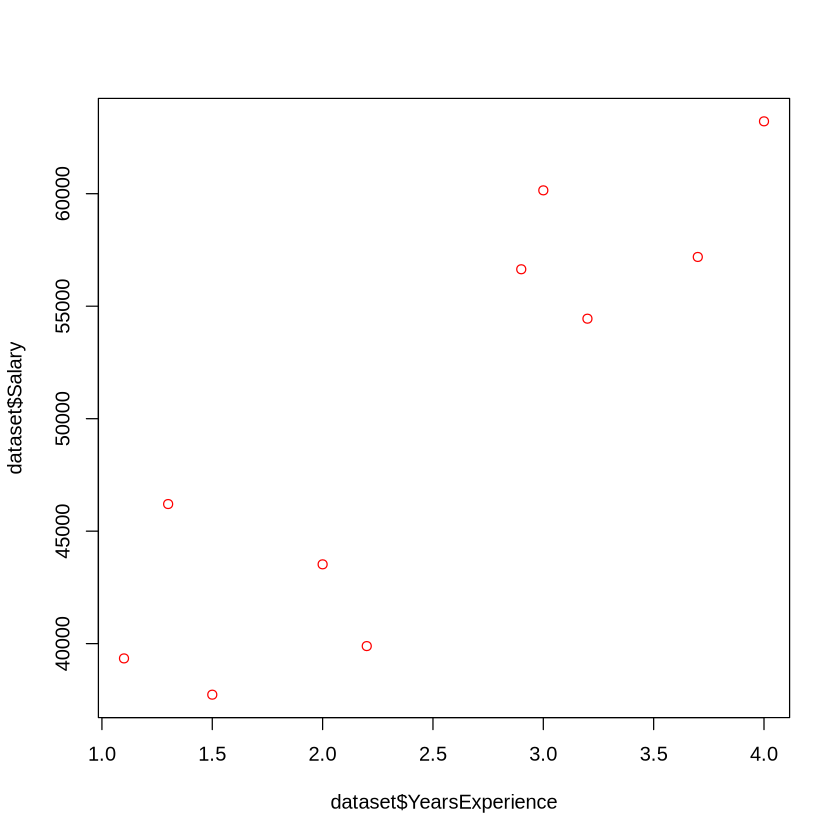

In [3]:
#Creating my scatter plot
plot(dataset$YearsExperience, dataset$Salary, col="red")

In [4]:
#Yay made a scatter plot! Now this command is used to fit a linear model on my scatter plot
model <- lm(Salary ~ YearsExperience, data=dataset) #

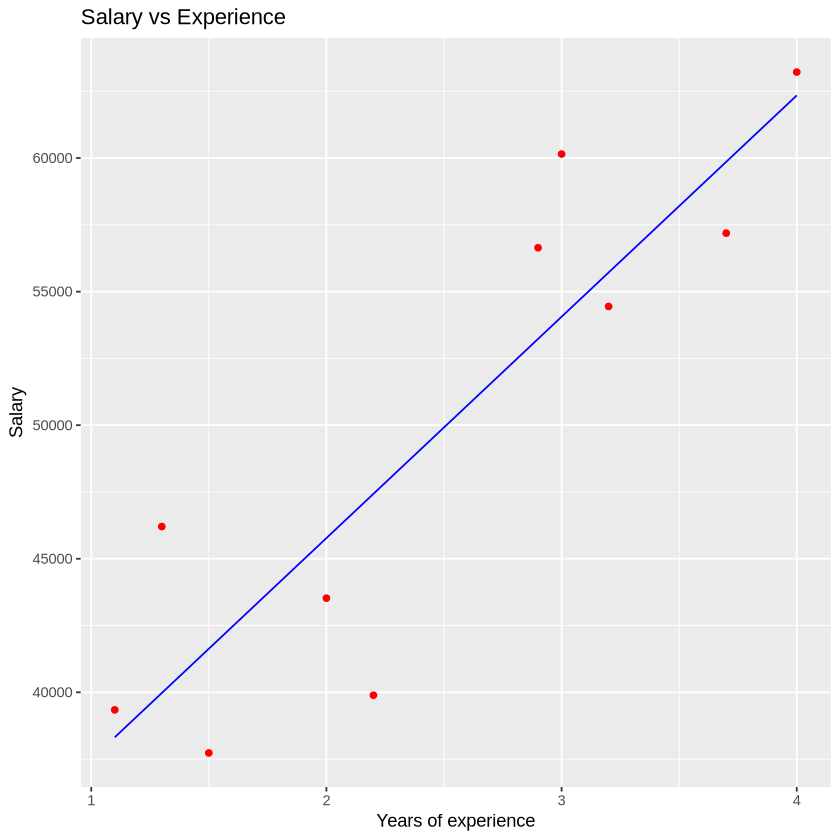

In [8]:
#ggplot2 is a visualization package at R that makes the plot. First line adds points, second adds linear model, and the last three add titles.
library(ggplot2)
ggplot() +
  geom_point(aes(x = dataset$YearsExperience, y = dataset$Salary), colour = 'red') +
  geom_line(aes(x = dataset$YearsExperience, y = predict(model, newdata = dataset)), colour = 'blue') +
  ggtitle('Salary vs Experience') +
  xlab('Years of experience') +
  ylab('Salary')

In [10]:
#This give you a bunch of statistical anaylses on the data you provided and on the linear model
summary(model)


Call:
lm(formula = Salary ~ YearsExperience, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-7540.2 -2564.9  -199.1  2814.8  6230.6 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        29204       4092   7.136 9.84e-05 ***
YearsExperience     8285       1532   5.407 0.000641 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4680 on 8 degrees of freedom
Multiple R-squared:  0.7852,	Adjusted R-squared:  0.7583 
F-statistic: 29.24 on 1 and 8 DF,  p-value: 0.0006407


`geom_smooth()` using formula = 'y ~ x'
Saving 7 x 7 in image
`geom_smooth()` using formula = 'y ~ x'


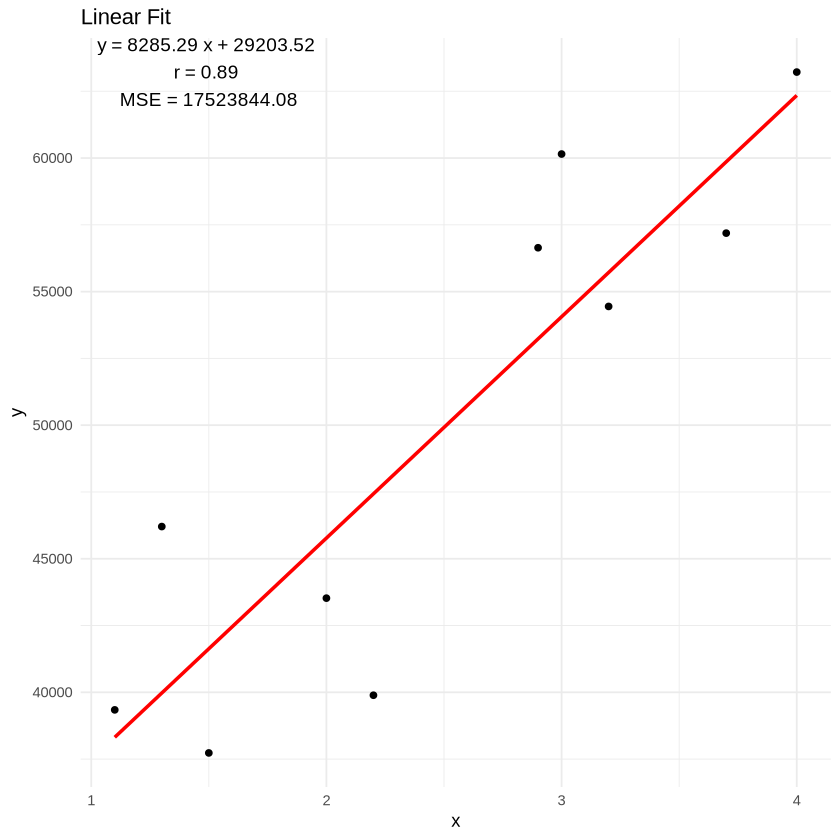

In [3]:
#This is for the assignment 3 addition
# Data - we are making our regression data into a frame, similar to how we made it into an array for python
df <- data.frame(
  x = c(1.1, 1.3, 1.5, 2.0, 2.2, 2.9, 3.0, 3.2, 3.7, 4.0),
  y = c(39343.0, 46205.0, 37731.0, 43525.0, 39891.0, 56642.0, 60150.0, 54445.0, 57189.0, 63218.0)
)

# Fit model - These commands all define our linear model on our graph and allow for the linear model to be calculated based on our data
#MSE is used to caluclate the average squared difference between predicted values and actual values in our dataset
model <- lm(y ~ x, data = df)
slope <- coef(model)[2]
intercept <- coef(model)[1]
r <- cor(df$x, df$y)
pred <- predict(model)
mse <- mean((df$y - pred)^2)

# Plot
#geom_point adds data points 
#geom_smooth adds the regression line
#annotate adds the text and its location and size
#labs enters titles 
#theme_minimal makes the graph have a simplistic asethetic 
ggplot(df, aes(x = x, y = y)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  annotate("text", x = 1.5, y = max(df$y) - 0.5,
           label = paste("y =", round(slope, 2), "x +", round(intercept, 2),
                         "\nr =", round(r, 2), "\nMSE =", round(mse, 2)),
           size = 4) +
  labs(title = "Linear Fit",
       x = "x", y = "y") +
  theme_minimal()

ggsave("regression_plot_r.png")